In [ ]:
"""
EXPLANATION OF COLUMNS

01) weather_code → short code representing weather condition (e.g., sunny, rainy, cloudy).
02) temperature_2m_max → maximum air temperature at 2 meters above ground during the day.
03) temperature_2m_min → minimum air temperature at 2 meters above ground during the day.
04) temperature_2m_mean → average air temperature at 2 meters above ground during the day.
05) apparent_temperature_max → maximum “feels like” temperature (accounts for humidity and wind) at 2m.
06) apparent_temperature_min → minimum “feels like” temperature at 2m.
07) apparent_temperature_mean → average “feels like” temperature at 2m.
08) daylight_duration → total duration of daylight in seconds (time between sunrise and sunset).
09) sunshine_duration → total duration of actual sunshine in seconds (time with direct sunlight).
10) precipitation_sum → total precipitation (rain + snow + hail) in mm over the day.
11) rain_sum → total rainfall in mm over the day.
12) precipitation_hours → total hours during which precipitation occurred.
13) wind_speed_10m_max → maximum sustained wind speed at 10 meters above ground.
14) wind_gusts_10m_max → maximum wind gusts at 10 meters above ground.
15) wind_direction_10m_dominant → dominant wind direction at 10 meters during the day (in degrees).
16) shortwave_radiation_sum → total solar radiation received at the surface during the day (in Joules per square meter).
17) et0_fao_evapotranspiration → reference evapotranspiration (water loss from soil + plants) calculated using FAO method (mm/day).
"""

In [140]:
import pandas as pd
import matplotlib.pyplot as plt

In [141]:
# Load the two datasets
location_df = pd.read_csv('./Datasets/location_data.csv')
weather_df = pd.read_csv('./Datasets/weather_data.csv')

# Take only the location_id and city_name from location dataset
new_location_df = location_df[['location_id', 'city_name']].copy()

# Merge the two datasets
merged_df = weather_df.merge(new_location_df, on='location_id', how='left')

In [142]:
merged_df.head()

,location_id,date,weather_code (wmo code),temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),apparent_temperature_max (°C),apparent_temperature_min (°C),apparent_temperature_mean (°C),daylight_duration (s),...,rain_sum (mm),precipitation_hours (h),wind_speed_10m_max (km/h),wind_gusts_10m_max (km/h),wind_direction_10m_dominant (°),shortwave_radiation_sum (MJ/m²),et0_fao_evapotranspiration (mm),sunrise,sunset,city_name
0,0,1/1/2010,1,30.1,22.6,26.0,34.5,25.0,29.0,42220.20,...,0.0,0,12.2,27.4,19,20.92,4.61,06:22,18:05,Colombo
1,0,1/2/2010,51,30.1,23.7,26.3,33.9,26.1,29.7,42225.71,...,0.1,1,13.0,27.0,24,17.71,3.91,06:22,18:06,Colombo
2,0,1/3/2010,51,29.6,23.1,26.0,34.5,26.2,29.9,42231.68,...,0.6,3,12.3,27.4,17,17.76,3.66,06:22,18:06,Colombo
3,0,1/4/2010,2,28.9,23.1,25.7,31.7,26.1,28.4,42238.11,...,0.0,0,17.0,34.6,357,16.50,3.75,06:23,18:07,Colombo
4,0,1/5/2010,1,28.1,21.3,24.6,30.0,22.9,26.2,42244.99,...,0.0,0,18.7,37.1,353,23.61,5.00,06:23,18:07,Colombo


# Data Cleaning

Header Cleaning

In [143]:

# Remove everything after the first space of every column name
# Before: weather_code (wmo code)  ->  After: weather_code
for col in merged_df.columns:
    merged_df.rename(columns={col: col.split(' ')[0]}, inplace=True)

merged_df.head(1)

,location_id,date,weather_code,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,daylight_duration,...,rain_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration,sunrise,sunset,city_name
0,0,1/1/2010,1,30.1,22.6,26.0,34.5,25.0,29.0,42220.2,...,0.0,0,12.2,27.4,19,20.92,4.61,06:22,18:05,Colombo


Data Cleaning

In [144]:
# ======================= Fixing data types ======================= #

# Converting date column to a datetime object
merged_df['date'] = pd.to_datetime(merged_df['date'], errors='coerce')

# Converting sunrise & sunset columns to a time object
merged_df['sunrise'] = pd.to_datetime(merged_df['sunrise'], format='%H:%M', errors='coerce').dt.time
merged_df['sunset'] = pd.to_datetime(merged_df['sunset'], format='%H:%M', errors='coerce').dt.time

print('Date data type: ', merged_df.date.dtype)
print('Sunrise data type: ', merged_df.sunrise.dtype)
print('Sunset data type: ', merged_df.sunset.dtype)

Date data type:  datetime64[ns]
Sunrise data type:  object
Sunset data type:  object


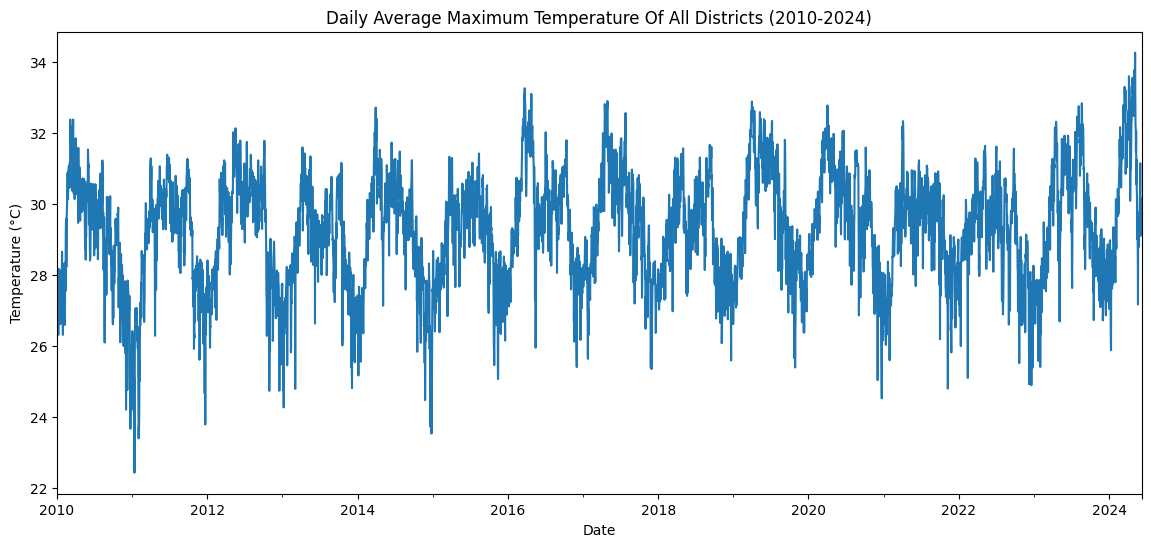

In [156]:
daily_avg_temp = merged_df.groupby('date')['temperature_2m_max'].mean()

plt.figure(figsize=(14,6))
daily_avg_temp.plot()
plt.title('Daily Average Maximum Temperature Of All Districts (2010-2024)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()

In [162]:
merged_df.apparent_temperature_max.max()

np.float64(46.1)